# EDA 1

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")

In [ ]:
'''Q.1  What is the range of selling prices in the dataset?'''

In [12]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"Range of selling_price: ₹{min_price} to ₹{max_price}")


Range of selling_price: ₹5000 to ₹760000


In [ ]:
'''Q.2 What is the median selling price for bikes in the dataset?'''

In [13]:
median_price = df['selling_price'].median()
print(f"Median selling price: ₹{median_price}")


Median selling price: ₹45000.0


In [ ]:
'''Q.3 What is the most common seller type?'''

In [14]:
most_common_seller = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller}")


Most common seller type: Individual


In [ ]:
'''Q.4 How many bikes have driven more than 50,000 kilometers?'''

In [15]:
high_km_bikes = (df['km_driven'] > 50000).sum()
print(f"Number of bikes driven more than 50,000 km: {high_km_bikes}")


Number of bikes driven more than 50,000 km: 170


In [ ]:
'''Q.5 What is the average km_driven value for each ownership type?'''

In [16]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:\n", avg_km_by_owner)


Average km_driven by ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
'''Q.6 What proportion of bikes are from the year 2015 or older?'''

In [17]:
prop_old_bikes = (df['year'] <= 2015).mean()
print(f"Proportion of bikes from 2015 or older: {prop_old_bikes:.2%}")


Proportion of bikes from 2015 or older: 56.64%


In [ ]:
'''Q.7 What is the trend of missing values across the dataset?'''

In [18]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
'''Q.8 What is the highest ex_showroom_price recorded, and for which bike?'''

In [19]:
max_ex_price = df['ex_showroom_price'].max()
bike_name = df[df['ex_showroom_price'] == max_ex_price]['name'].values[0]
print(f"Highest ex_showroom_price: ₹{max_ex_price} for bike: {bike_name}")


Highest ex_showroom_price: ₹1278000.0 for bike: Harley-Davidson Street Bob


In [ ]:
'''Q.9 What is the total number of bikes listed by each seller type?'''

In [20]:
seller_counts = df['seller_type'].value_counts()
print("Total bikes by seller type:\n", seller_counts)


Total bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
'''Q.10 What is the relationship between selling_price and km_driven for first-owner bikes?'''

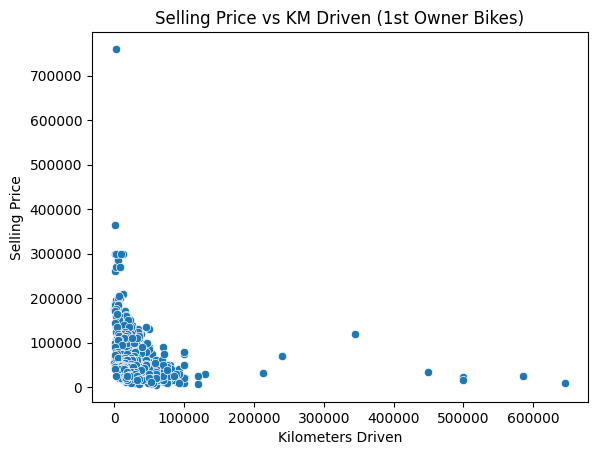

In [21]:
# Filter only 1st owner bikes
first_owner_df = df[df['owner'].str.contains("1st", na=False)]

# Scatter plot
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven (1st Owner Bikes)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()


In [ ]:
'''Q.11 Identify and remove outliers in the km_driven column using the IQR method'''

In [22]:
# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Filter data within IQR bounds
filtered_df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

print(f"Original data shape: {df.shape}")
print(f"After removing outliers: {filtered_df.shape}")


Original data shape: (1061, 7)
After removing outliers: (1022, 7)


In [ ]:
'''Q.12 Perform a bivariate analysis to visualize the relationship between year and selling_price'''

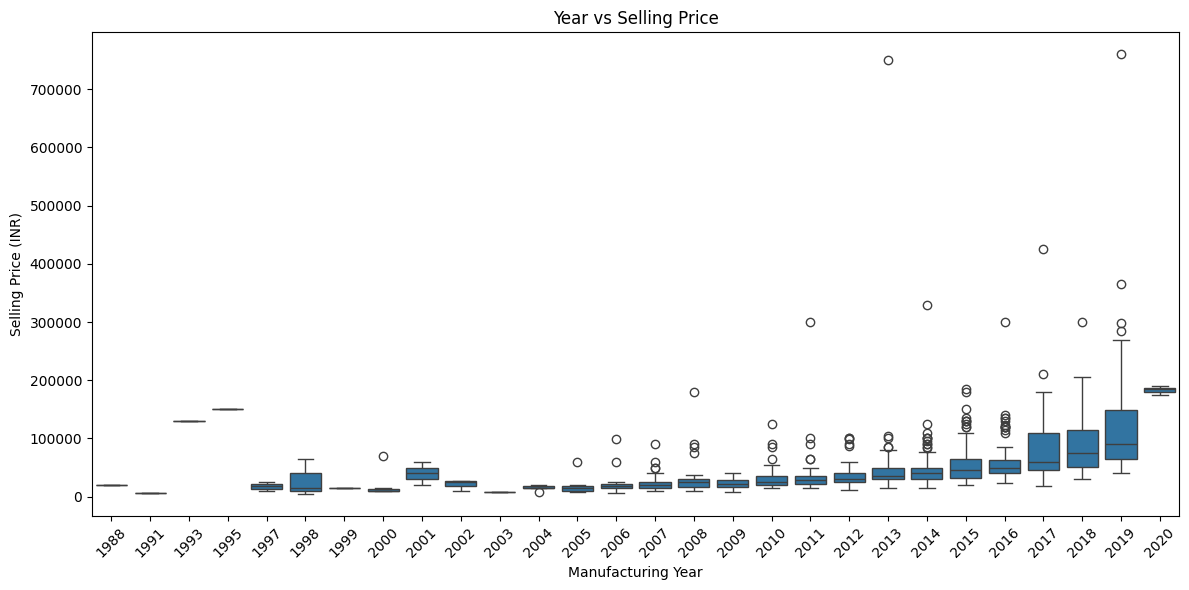

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.13 What is the average depreciation in selling price based on the bike's age (2025 - manufacturing year)?'''

In [24]:
# Add a new column for bike age
df['bike_age'] = 2025 - df['year']

# Group by age and calculate average selling price
avg_depreciation = df.groupby('bike_age')['selling_price'].mean().sort_index()

print("Average selling price by bike age:")
print(avg_depreciation)


Average selling price by bike age:
bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [ ]:
'''Q.14 Which bike names are priced significantly above the average price for their manufacturing year?'''

In [25]:
# Calculate yearly average and standard deviation
year_avg = df.groupby('year')['selling_price'].mean()
year_std = df.groupby('year')['selling_price'].std()

# Define a price threshold: avg + 1.5 * std
thresholds = year_avg + 1.5 * year_std

# Identify high-priced bikes
def is_high_price(row):
    return row['selling_price'] > thresholds[row['year']]

high_priced_bikes = df[df.apply(is_high_price, axis=1)]

# Display relevant columns
print("Bikes priced significantly above average for their manufacturing year:")
print(high_priced_bikes[['name', 'year', 'selling_price']])


Bikes priced significantly above average for their manufacturing year:
                                     name  year  selling_price
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
37                         Honda CBR-250R  2016         120000
42                           KTM 390 Duke  2017         175000
52              Royal Enfield Electra 5 S  2010          90000
..                                    ...   ...            ...
960             Royal Enfield Thunder 500  2018         175000
966                        Hyosung GT250R  2016         135000
967             Royal Enfield Thunder 350  2015         125000
972                         KTM 390 Duke   2016         115000
976             Royal Enfield Classic 350  2015         110000

[77 rows x 3 columns]


In [ ]:
'''Q.15 Develop a correlation matrix for numeric columns and visualize it using a heatmap'''

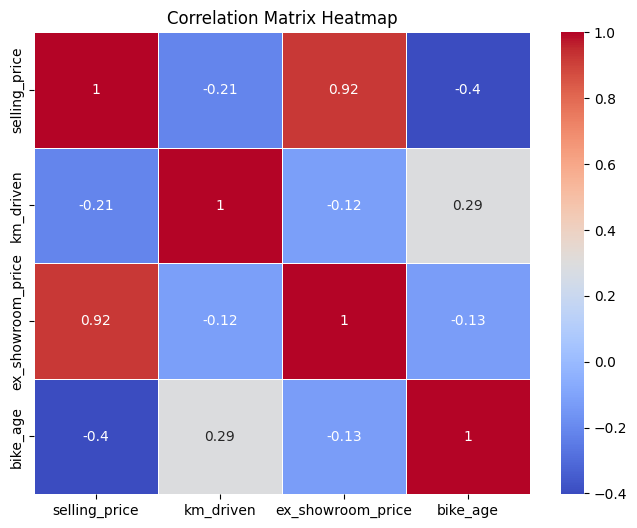

In [26]:
# Select numeric columns
numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price', 'bike_age']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# EDA 2

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for inline plots
%matplotlib inline

# Load dataset
df = pd.read_csv("/content/Car Sale.csv")



In [ ]:
'''Q.1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?'''

In [29]:
# Group by dealer and calculate mean selling price
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print("Average selling price for each dealer:")
print(avg_price_by_dealer)


Average selling price for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28

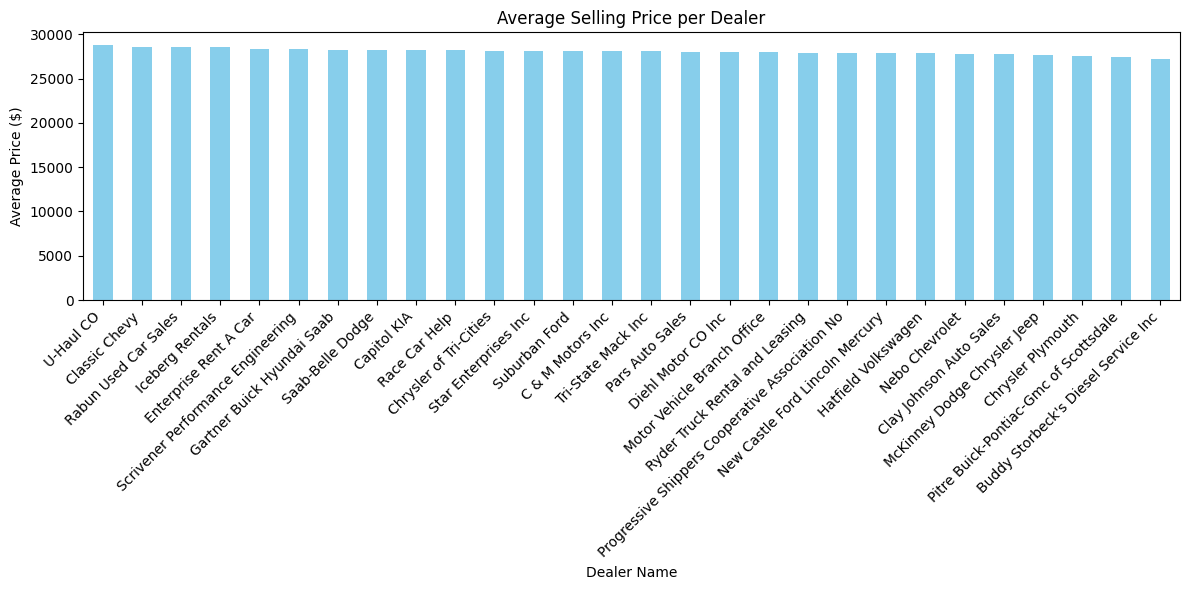

In [30]:
plt.figure(figsize=(12, 6))
avg_price_by_dealer.plot(kind='bar', color='skyblue')
plt.title("Average Selling Price per Dealer")
plt.ylabel("Average Price ($)")
plt.xlabel("Dealer Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
'''Q.2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?'''

In [31]:
# Calculate standard deviation of prices for each brand (Company)
price_variation_by_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

print("Price variation (Standard Deviation) by Company:")
print(price_variation_by_brand)


Price variation (Standard Deviation) by Company:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


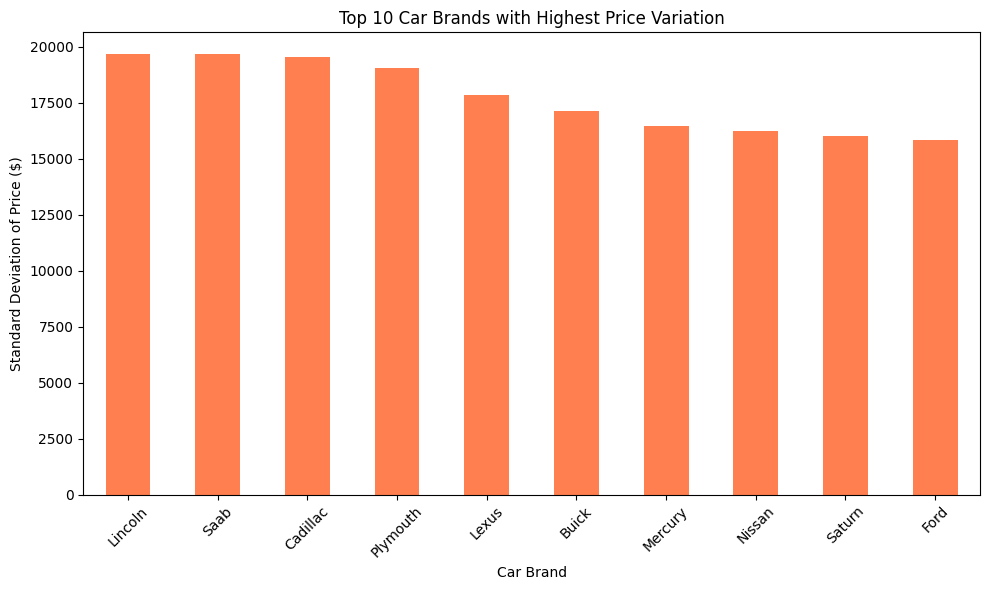

In [32]:
top_var_brands = price_variation_by_brand.head(10)

plt.figure(figsize=(10, 6))
top_var_brands.plot(kind='bar', color='coral')
plt.title("Top 10 Car Brands with Highest Price Variation")
plt.ylabel("Standard Deviation of Price ($)")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?'''

/tmp/ipython-input-33-3021733908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')


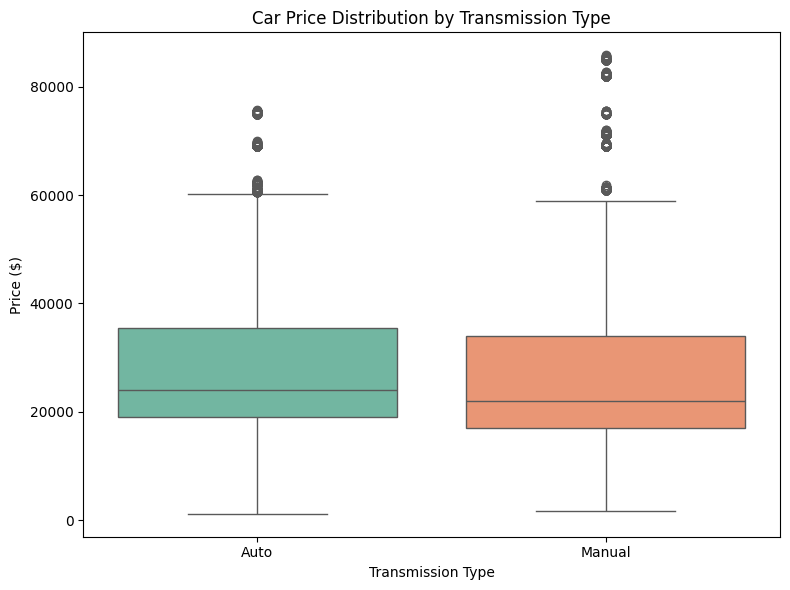

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')
plt.title("Car Price Distribution by Transmission Type")
plt.ylabel("Price ($)")
plt.xlabel("Transmission Type")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.4 What is the distribution of car prices across different regions?'''

/tmp/ipython-input-34-1442955021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='pastel')


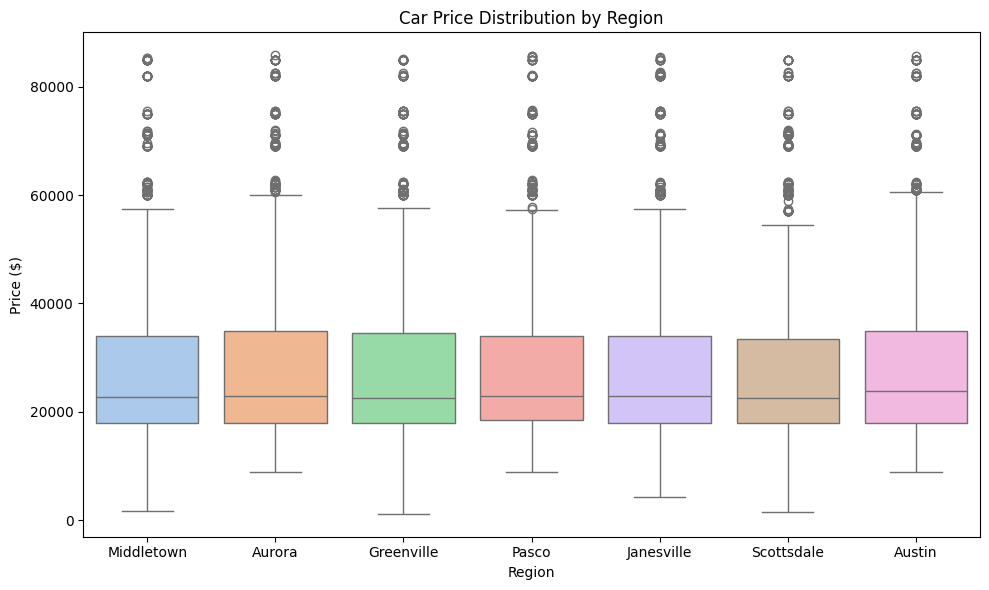

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='pastel')
plt.title("Car Price Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.5 What is the distribution of cars based on body styles?'''

In [35]:
# Count of cars per body style
body_style_counts = df['Body Style'].value_counts()

print("Car count by body style:")
print(body_style_counts)


Car count by body style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


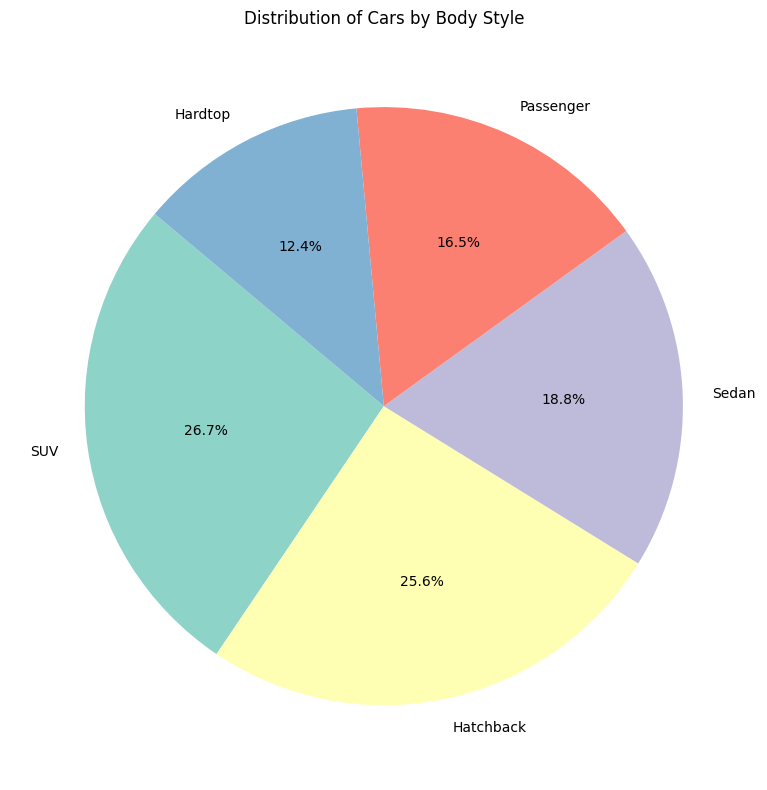

In [36]:
plt.figure(figsize=(8, 8))
body_style_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Distribution of Cars by Body Style")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()


In [ ]:
'''Q.6 How does the average selling price of cars vary by customer gender and annual income?'''

In [37]:
# Group by Gender and calculate average price and income
avg_price_income_by_gender = df.groupby('Gender')[['Price ($)', 'Annual Income']].mean()

print("Average selling price and income by Gender:")
print(avg_price_income_by_gender)


Average selling price and income by Gender:
           Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207


/tmp/ipython-input-38-303408863.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Gender', y='Price ($)', palette='muted', ci=None)
/tmp/ipython-input-38-303408863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Price ($)', palette='muted', ci=None)


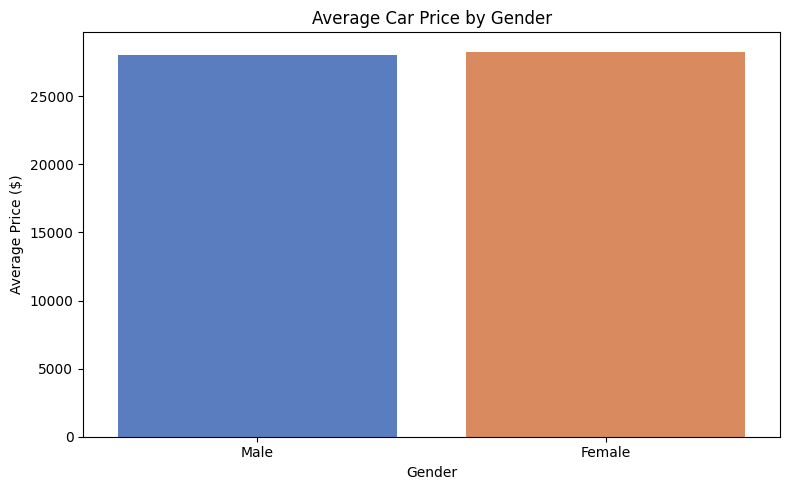

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Gender', y='Price ($)', palette='muted', ci=None)
plt.title("Average Car Price by Gender")
plt.ylabel("Average Price ($)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?'''

In [39]:
#A. Average car price by region

avg_price_by_region = df.groupby('Dealer_Region')['Price ($)'].mean()
print("Average price by region:")
print(avg_price_by_region)


Average price by region:
Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64


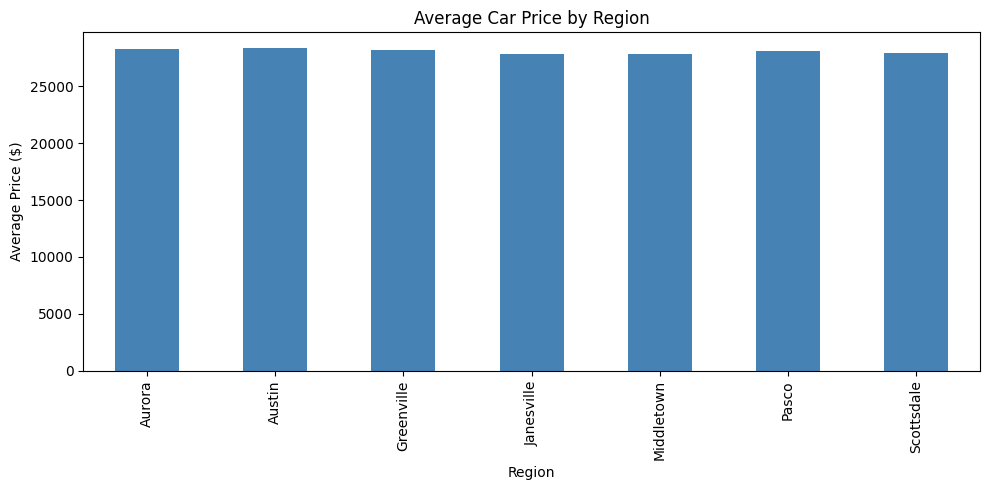

In [41]:
plt.figure(figsize=(10, 5))
avg_price_by_region.plot(kind='bar', color='steelblue')
plt.title("Average Car Price by Region")
plt.ylabel("Average Price ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


In [40]:
#B. Number of cars sold by region

cars_count_by_region = df['Dealer_Region'].value_counts()
print("\nNumber of cars sold by region:")
print(cars_count_by_region)



Number of cars sold by region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


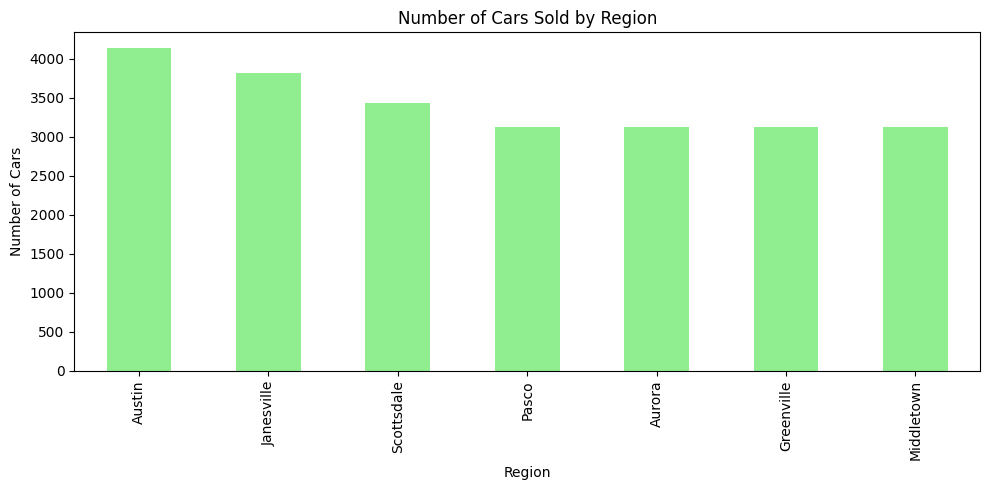

In [42]:
plt.figure(figsize=(10, 5))
cars_count_by_region.plot(kind='bar', color='lightgreen')
plt.title("Number of Cars Sold by Region")
plt.ylabel("Number of Cars")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.8 How does the average car price differ between cars with different engine sizes?'''

In [43]:
# Group by engine type and compute average price
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

print("Average car price by engine size:")
print(avg_price_by_engine)


Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


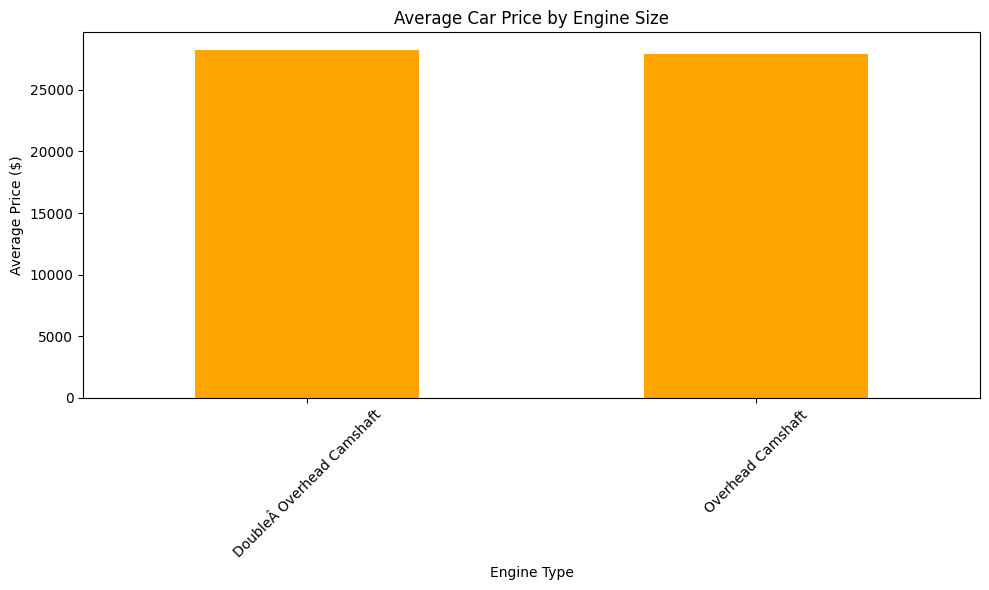

In [44]:
plt.figure(figsize=(10, 6))
avg_price_by_engine.plot(kind='bar', color='orange')
plt.title("Average Car Price by Engine Size")
plt.ylabel("Average Price ($)")
plt.xlabel("Engine Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.9 How do car prices vary based on the customer’s annual income bracket?'''

In [45]:
#Step 1: Create income brackets
# Create income brackets
bins = [0, 30000, 60000, 100000, 150000, np.inf]
labels = ['<30K', '30K–60K', '60K–100K', '100K–150K', '150K+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)


In [46]:
# Step 2: Calculate average price per bracket
avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()
print("Average car price by income bracket:")
print(avg_price_by_income_bracket)


Average car price by income bracket:
Income_Bracket
<30K         27884.297820
30K–60K               NaN
60K–100K     43000.000000
100K–150K    23200.200000
150K+        28149.089557
Name: Price ($), dtype: float64


/tmp/ipython-input-46-615367560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()


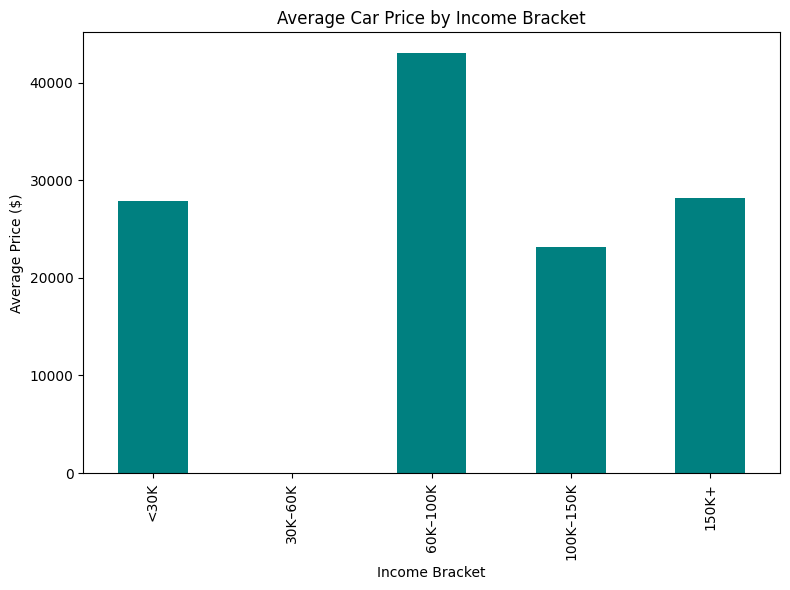

In [47]:
plt.figure(figsize=(8, 6))
avg_price_by_income_bracket.plot(kind='bar', color='teal')
plt.title("Average Car Price by Income Bracket")
plt.ylabel("Average Price ($)")
plt.xlabel("Income Bracket")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?'''

In [48]:
#Step 1: Identify top 5 most sold models
top_models = df['Model'].value_counts().head(5)
print("Top 5 most sold car models:")
print(top_models)


Top 5 most sold car models:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


/tmp/ipython-input-49-3977072877.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_model_df, x='Model', y='Price ($)', palette='Set3')


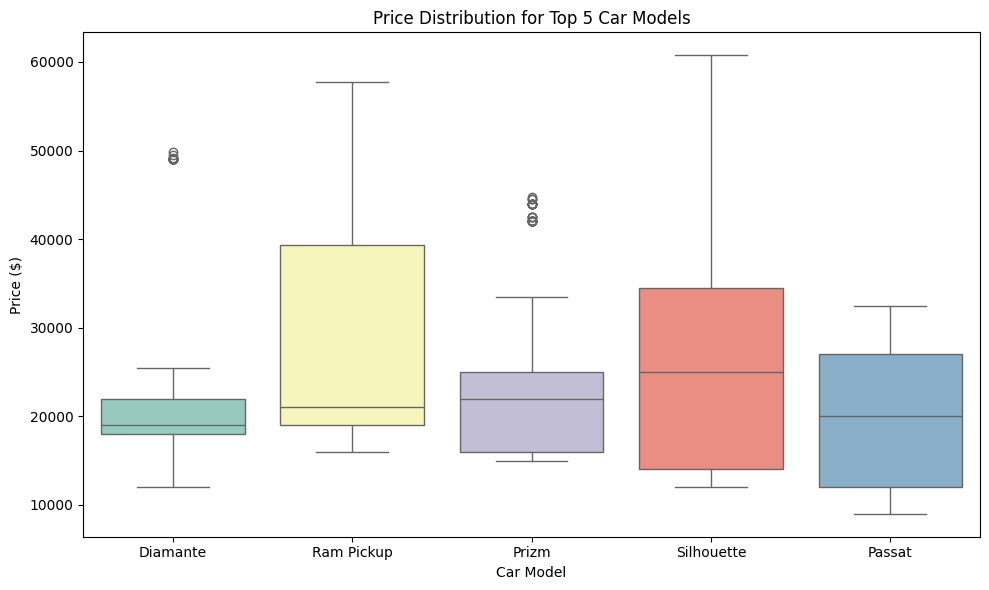

In [49]:
#Step 2: Visualize price distribution for those models
top_model_names = top_models.index.tolist()
top_model_df = df[df['Model'].isin(top_model_names)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_model_df, x='Model', y='Price ($)', palette='Set3')
plt.title("Price Distribution for Top 5 Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?'''

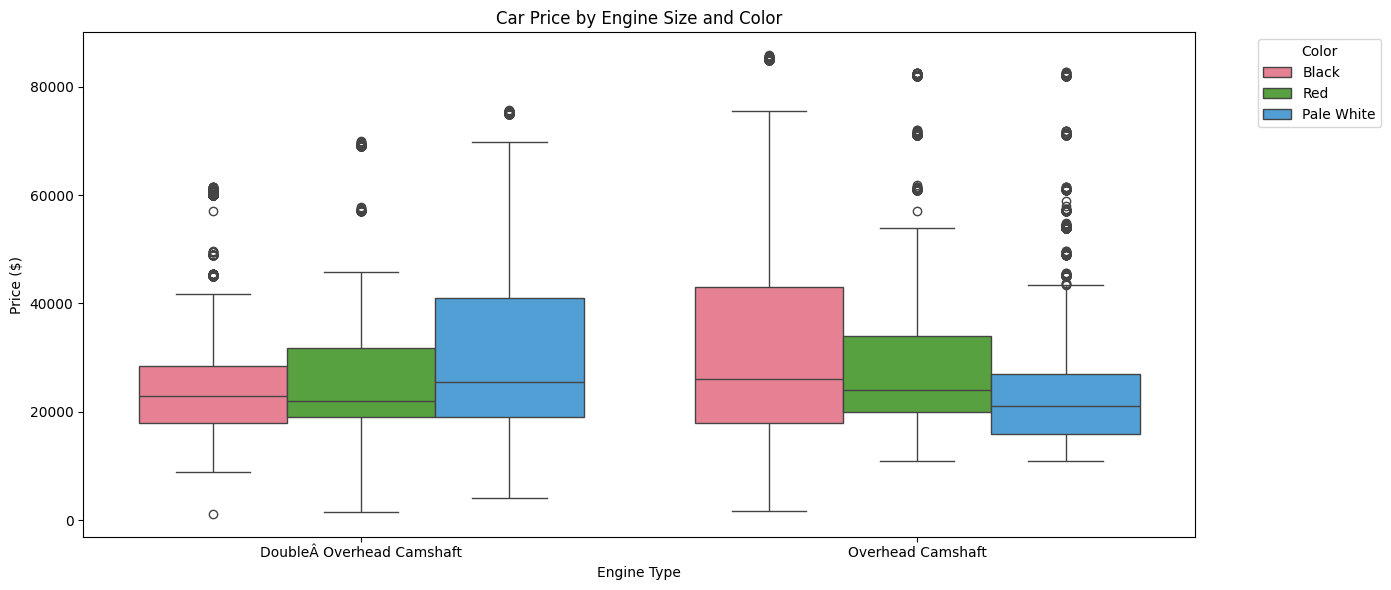

In [50]:
#A. Boxplot of Price by Engine and Color

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Engine', y='Price ($)', hue='Color', palette='husl')
plt.title("Car Price by Engine Size and Color")
plt.ylabel("Price ($)")
plt.xlabel("Engine Type")
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [51]:
#B. Identify colors with highest price variation
price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Colors with highest price variation:")
print(price_variation_by_color.head(5))


Colors with highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [ ]:
'''Q.12 Is there any seasonal trend in car sales based on the date of sale?'''

In [52]:
#Step 1: Convert Date column to datetime and extract month
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month name
df['Month'] = df['Date'].dt.month_name()


In [53]:
#Step 2: Count sales per month
monthly_sales = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

print("Car sales per month:")
print(monthly_sales)


Car sales per month:
Month
January       790
February      735
March        1535
April        1655
May          1895
June         1715
July         1725
August       1705
September    3305
October      1830
November     3470
December     3546
Name: count, dtype: int64


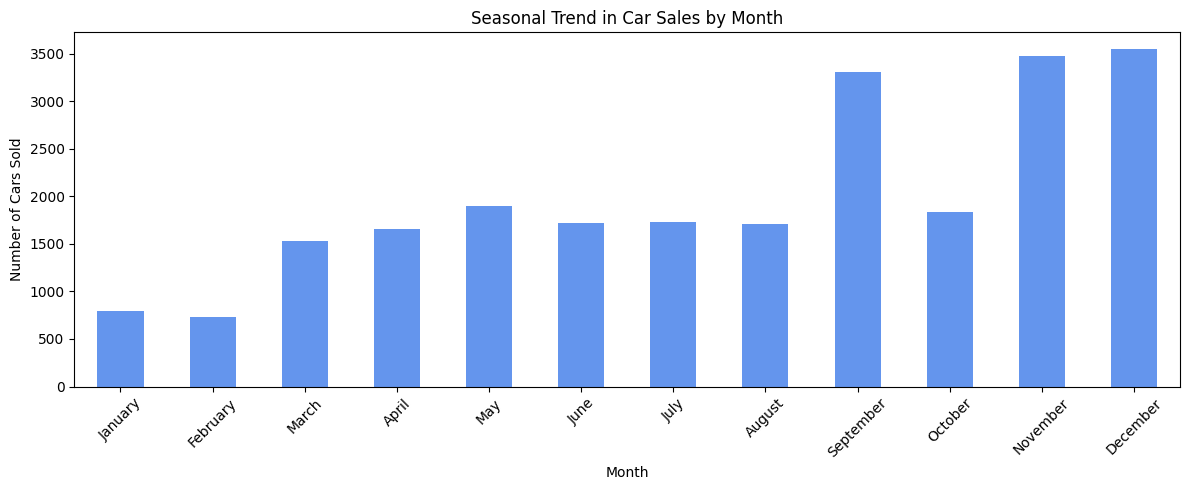

In [54]:
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='bar', color='cornflowerblue')
plt.title("Seasonal Trend in Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.13 How does the car price distribution change when considering different combinations of body style and transmission type?'''

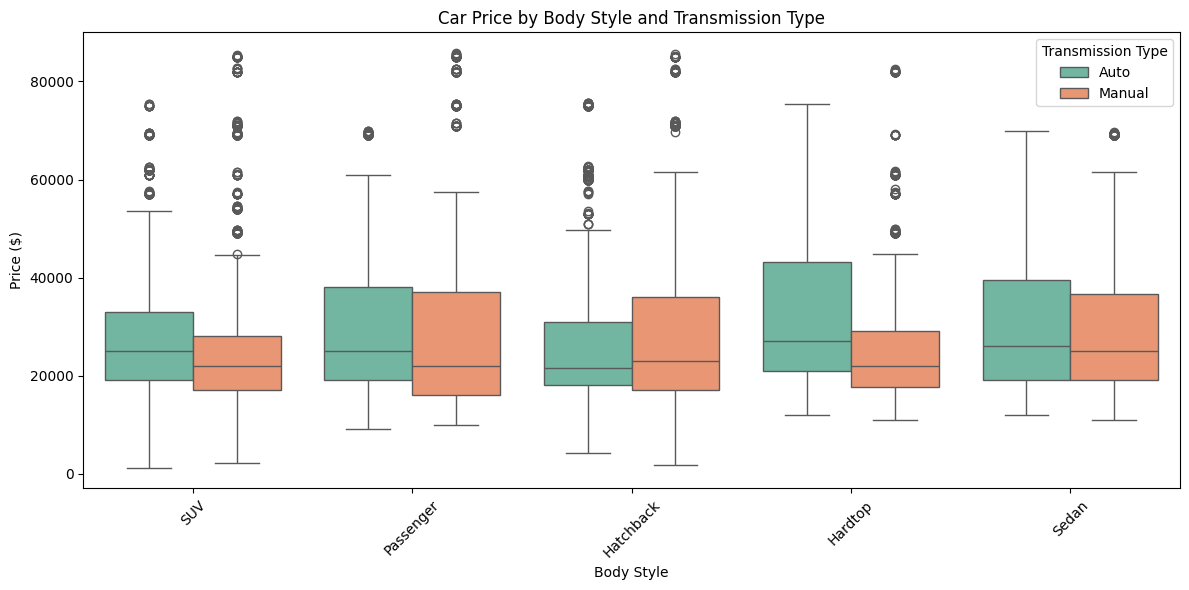

In [55]:
# Use a grouped boxplot:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', palette='Set2')
plt.title("Car Price by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.legend(title='Transmission Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.14 What is the correlation between car price, engine size, and annual income of customers?'''

In [56]:
#Step 1: Convert engine type to numeric
# Convert engine type like 'V6', 'I4' into numeric values
df['Engine_Size'] = df['Engine'].str.extract('(\d+)').astype(float)


In [57]:
#Step 2: Correlation matrix
# Select relevant numeric columns
corr_df = df[['Price ($)', 'Annual Income', 'Engine_Size']]

# Calculate correlation
correlation = corr_df.corr()
print("Correlation matrix:")
print(correlation)


Correlation matrix:
               Price ($)  Annual Income  Engine_Size
Price ($)       1.000000       0.012065          NaN
Annual Income   0.012065       1.000000          NaN
Engine_Size          NaN            NaN          NaN


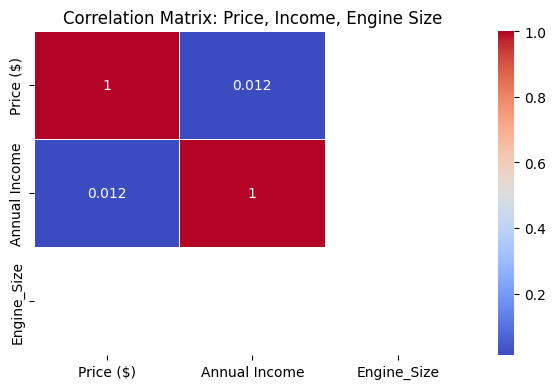

In [58]:
#Step 3: Heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix: Price, Income, Engine Size")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.15 How does the average car price vary across different car models and engine types?'''

In [59]:
# Step 1: Group by both Model and Engine
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)

print("Average car price by model and engine:")
print(avg_price_model_engine.head(10))  # Display top 10 combinations


Average car price by model and engine:
Model        Engine                   
SC           Overhead Camshaft            61074.818182
Ranger       DoubleÂ Overhead Camshaft    61064.055556
Sable        Overhead Camshaft            61039.770833
Catera       DoubleÂ Overhead Camshaft    56836.933333
LX470        Overhead Camshaft            54037.490196
LS400        Overhead Camshaft            53157.941558
GS400        Overhead Camshaft            53086.000000
Tacoma       DoubleÂ Overhead Camshaft    53085.821918
Aurora       Overhead Camshaft            51833.556962
Park Avenue  DoubleÂ Overhead Camshaft    49387.750000
Name: Price ($), dtype: float64


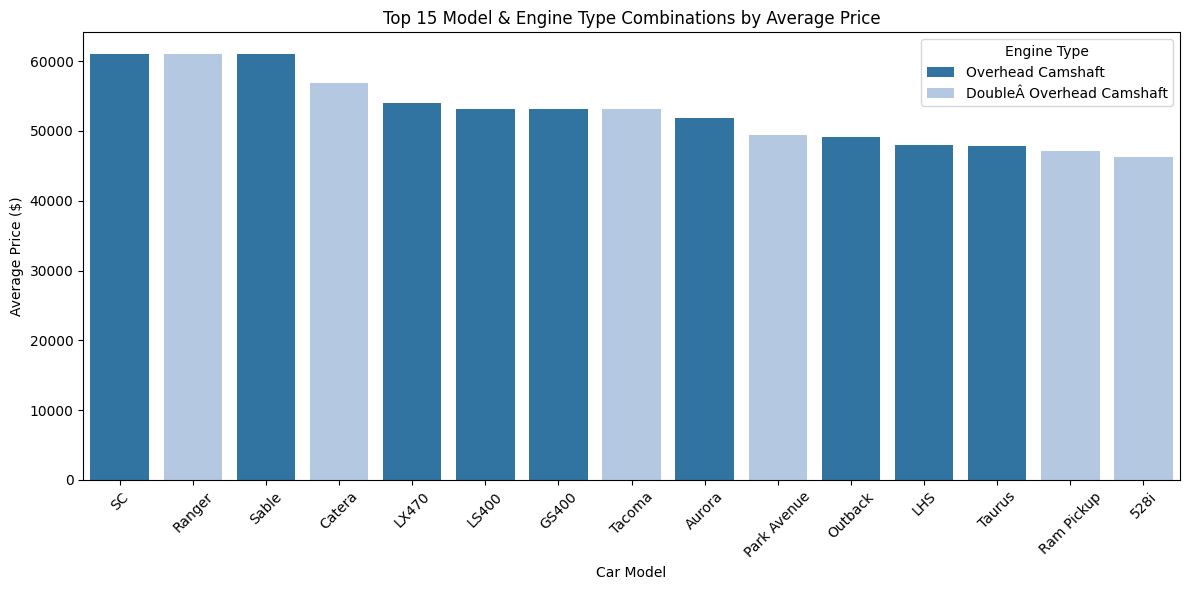

In [61]:
top15 = avg_price_model_engine.head(15).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x='Model', y='Price ($)', hue='Engine', palette='tab20')
plt.title("Top 15 Model & Engine Type Combinations by Average Price")
plt.ylabel("Average Price ($)")
plt.xlabel("Car Model")
plt.xticks(rotation=45)
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()


# EDA 3

In [63]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
%matplotlib inline

# Load the dataset
df = pd.read_csv("/content/amazon.csv")


In [ ]:
'''Q.1 What is the average rating for each product category?'''

In [66]:
#Step 1: Convert rating to numeric
# Convert rating to numeric (will turn invalid strings to NaN)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [67]:
#Step 2: Now calculate average rating per category
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

print("Average rating by product category:")
print(avg_rating_by_category)


Average rating by product category:
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessori

In [ ]:
'''Q.2 What are the top rating_count products by category?'''

In [70]:
# First, ensure rating_count is numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop rows with missing category or product name
df_clean = df.dropna(subset=['category', 'product_name'])

# Sort by rating_count descending
top_products = df_clean.sort_values(['category', 'rating_count'], ascending=[True, False])

# Show top 3 products per category
top_by_category = top_products.groupby('category').head(3)

print("Top rated products by category (based on rating_count):")
print(top_by_category[['category', 'product_name', 'rating_count']])


Top rated products by category (based on rating_count):
                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
742   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
858   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
919   OfficeProducts|OfficePaperProducts|Paper|Stati...   
955   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...           NaN  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...           NaN  
742   Kanget [2 Pac

In [ ]:
'''Q.3 What is the distribution of discounted prices vs. actual prices?'''

In [71]:
#Step 1: Convert columns to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')


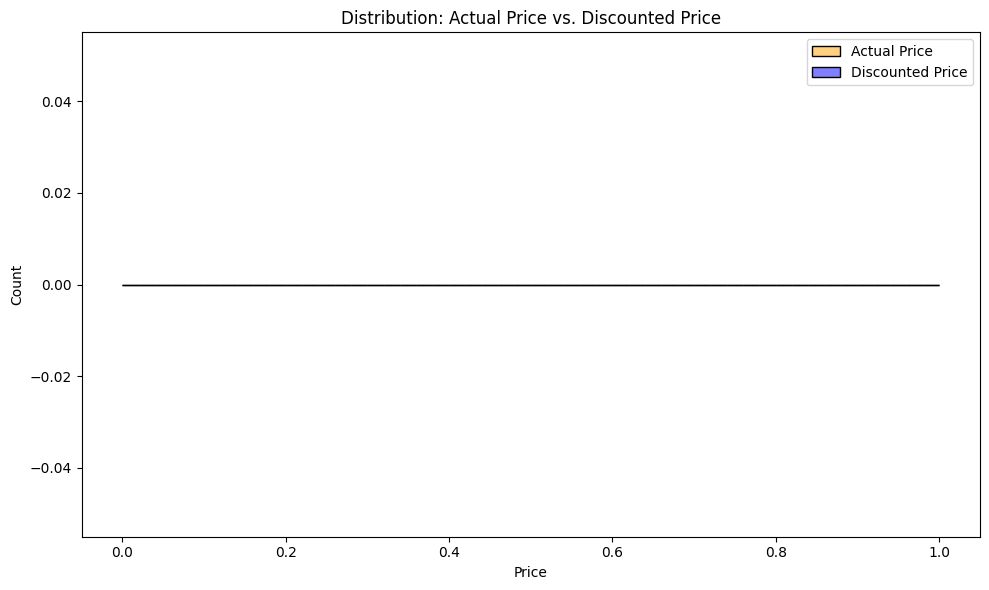

In [72]:
#Step 2: Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], bins=50, label='Actual Price', color='orange', kde=True)
sns.histplot(df['discounted_price'], bins=50, label='Discounted Price', color='blue', kde=True)
plt.title("Distribution: Actual Price vs. Discounted Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
'''Q.4 How does the average discount percentage vary across categories?'''

In [73]:
# Step 1: Convert discount_percentage to numeric
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')


In [74]:
# Step 2: Group by category and calculate average discount
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

print("Average discount percentage by category:")
print(avg_discount_by_category)


Average discount percentage by category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSup

In [ ]:
'''Q.5 What are the most popular product names?'''

In [76]:
#Step 1: Group by product name and sum rating_count
# Group and sort by total rating_count
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False)

print("Top 10 most popular product names (by rating count):")
print(popular_products.head(10))


Top 10 most popular product names (by rating count):
product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with O

/tmp/ipython-input-77-3957705131.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


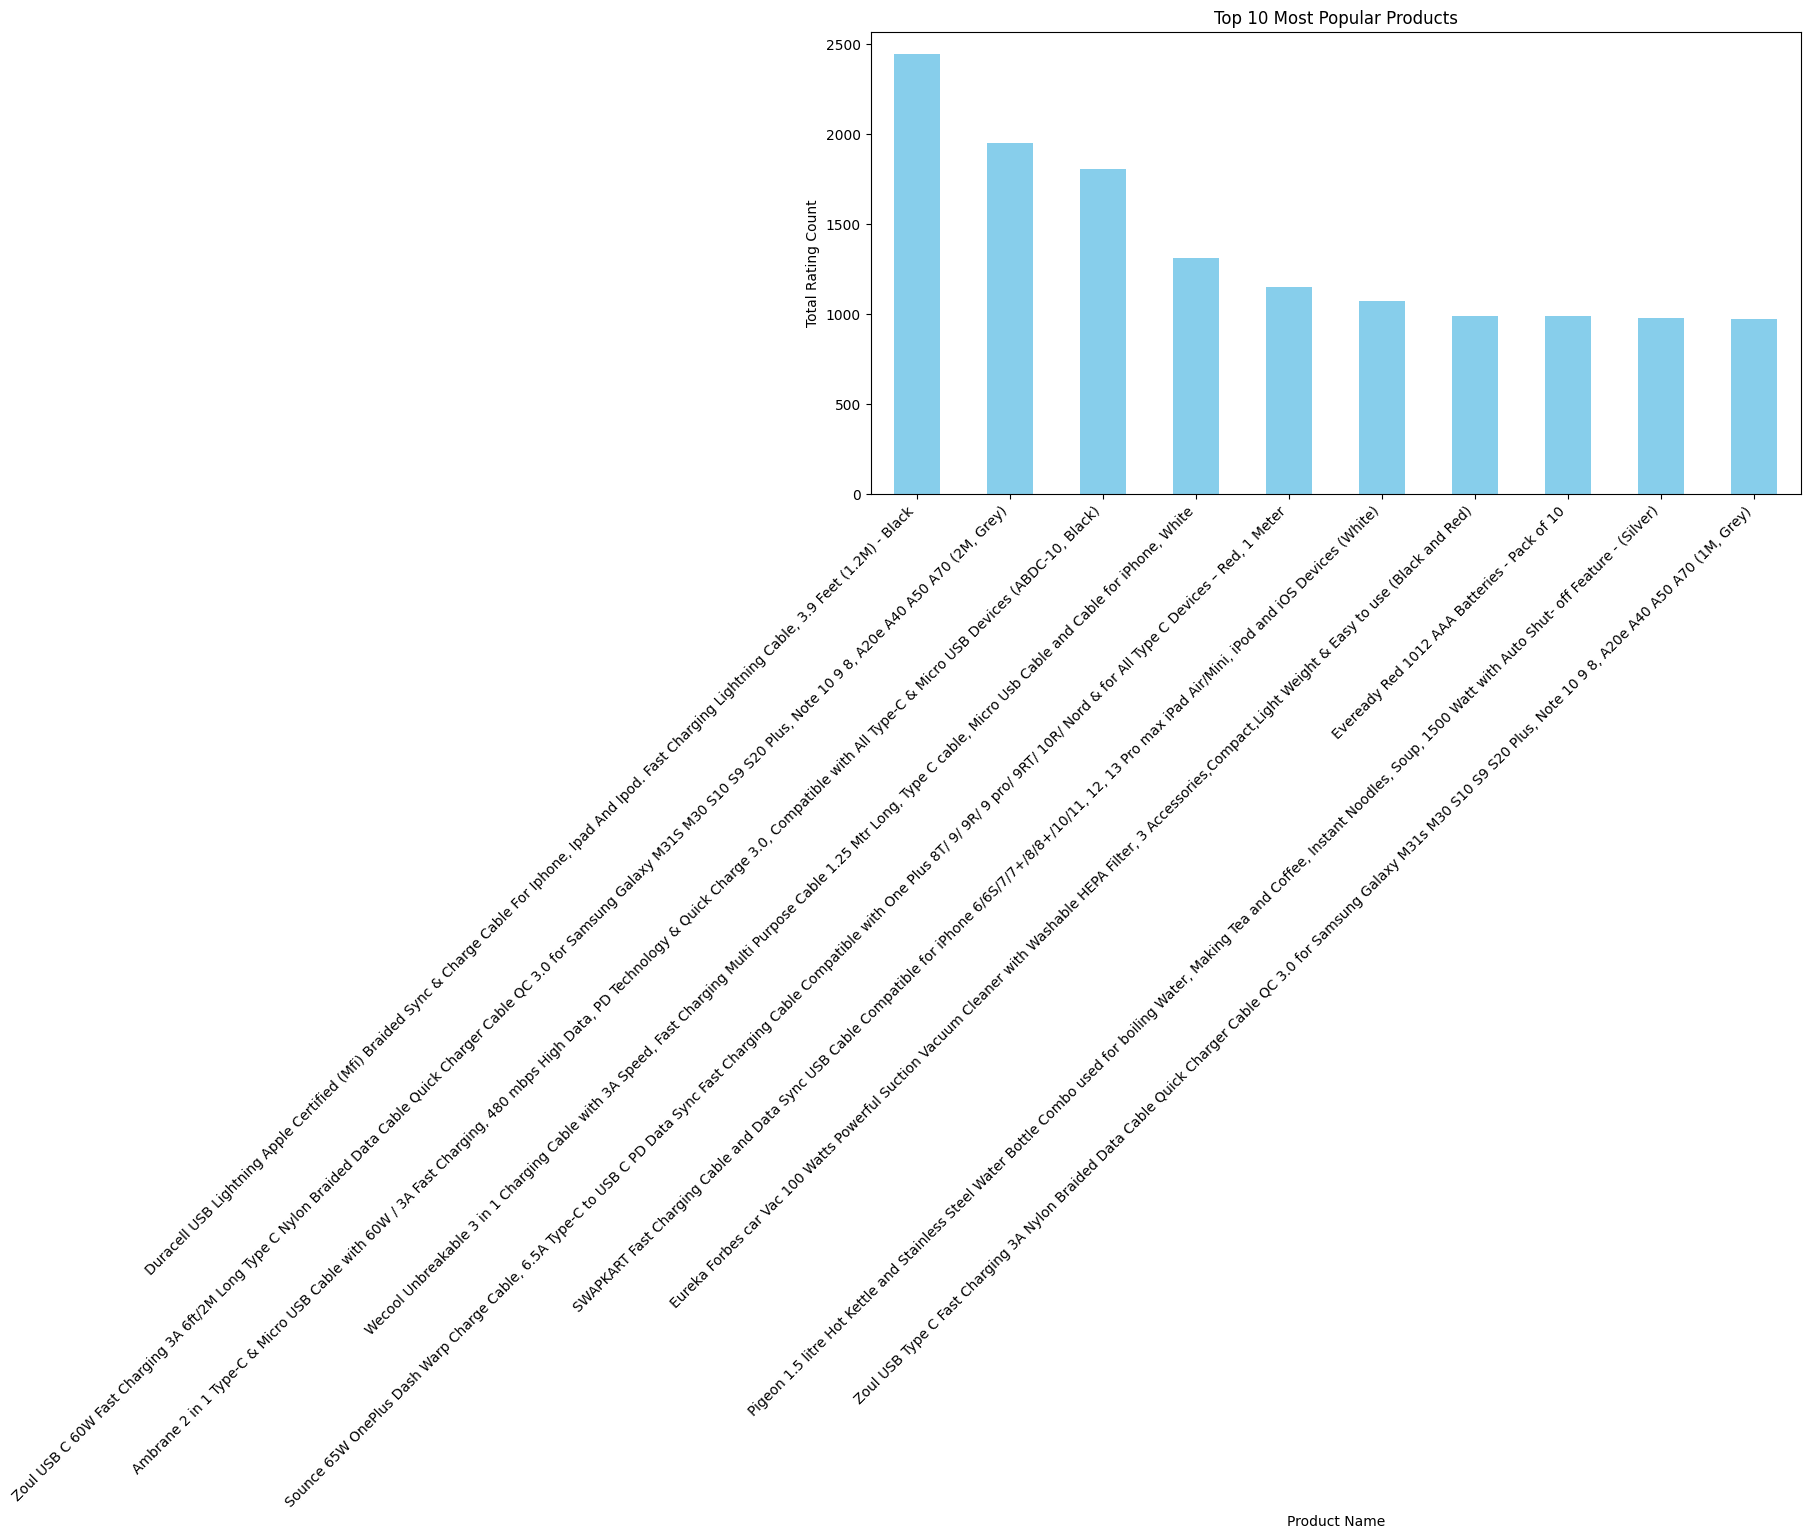

In [77]:
plt.figure(figsize=(12, 6))
popular_products.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular Products")
plt.ylabel("Total Rating Count")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
'''Q.6 What are the most popular product keywords?'''

In [78]:
from collections import Counter
import re

# Combine all product names
all_names = ' '.join(df['product_name'].dropna().astype(str).values)

# Remove punctuation and convert to lowercase
cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_names.lower())

# Split into words and count frequency
words = cleaned_text.split()
common_keywords = Counter(words).most_common(15)

# Convert to DataFrame
keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Frequency'])

print("Top 15 product keywords:")
print(keywords_df)


Top 15 product keywords:
       Keyword  Frequency
0         with        752
1          for        674
2        black        468
3        cable        401
4          usb        390
5          and        330
6     charging        246
7           to        218
8         fast        211
9            c        188
10       smart        172
11       white        155
12        type        149
13          tv        146
14  compatible        142


/tmp/ipython-input-79-1244227558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, x='Keyword', y='Frequency', palette='viridis')


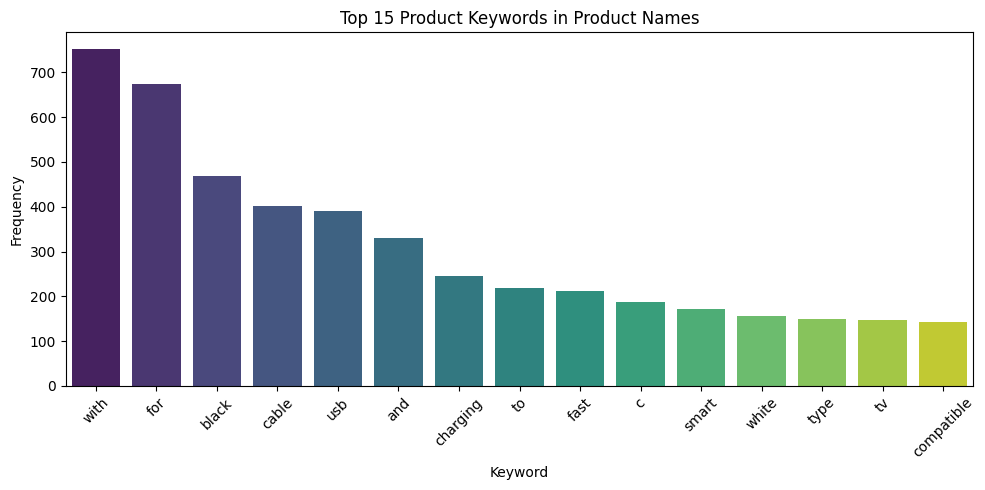

In [79]:
plt.figure(figsize=(10, 5))
sns.barplot(data=keywords_df, x='Keyword', y='Frequency', palette='viridis')
plt.title("Top 15 Product Keywords in Product Names")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.7 What are the most popular product reviews?'''

In [80]:
# Sort by rating_count to get top reviews
top_reviews = df[['product_name', 'rating_count', 'review_title', 'review_content']].dropna(subset=['review_title', 'review_content'])
top_reviews = top_reviews.sort_values(by='rating_count', ascending=False)

# Show top 5
print("Top 5 most popular product reviews:")
print(top_reviews.head(5))


Top 5 most popular product reviews:
                                           product_name  rating_count  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0   
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is good but bottle is not good quality,...   
823   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging Speeds Could Be Better,G...   

                                         review_content  
1279  Does the job well,doesn't work on sand. though...  
750   Nive,very good batteries received,Like,Good pr..

In [ ]:
'''Q.8 What is the correlation between discounted_price and rating?'''

In [81]:
# Step 1: Ensure both columns are numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [82]:
#Step 2: Calculate correlation
correlation = df[['discounted_price', 'rating']].corr()
print("Correlation between discounted price and rating:")
print(correlation)


Correlation between discounted price and rating:
                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0


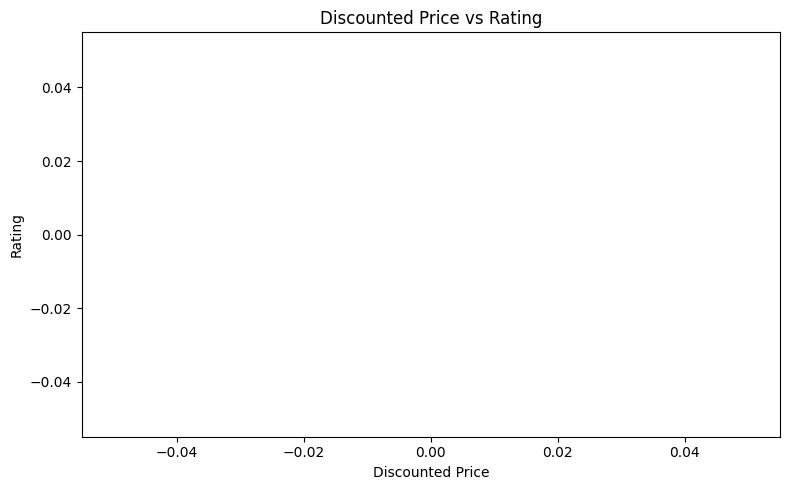

In [83]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discounted_price', y='rating', alpha=0.5)
plt.title("Discounted Price vs Rating")
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.9 What are the top 5 categories based on the highest ratings?'''

In [84]:
top_rated_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

print("Top 5 categories based on highest average ratings:")
print(top_rated_categories)


Top 5 categories based on highest average ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


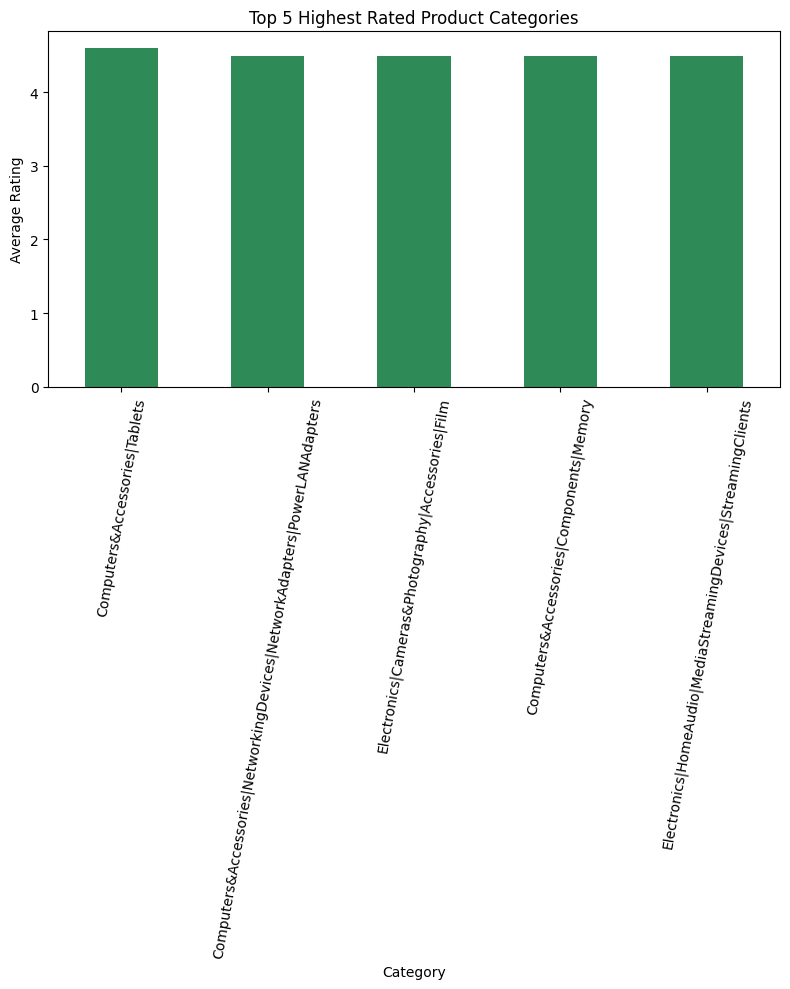

In [91]:
plt.figure(figsize=(8, 10))
top_rated_categories.plot(kind='bar', color='seagreen')
plt.title("Top 5 Highest Rated Product Categories")
plt.ylabel("Average Rating")
plt.xlabel("Category")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.10  Identify any potential areas for improvement or optimization based on the data analysis'''



1. Improve Low-Rated Categories

   Several product categories have lower average customer ratings, indicating dissatisfaction.

   Optimization: Focus on improving product quality, descriptions, packaging, and customer service in these specific categories.

2. Ensure Quality in Heavily Discounted Products
   Some products with high discount percentages received low ratings. This suggests that discounts alone do not guarantee customer satisfaction.

   Optimization: Conduct quality checks and avoid aggressive discounts on underperforming products.

3. Encourage Customer Reviews
   Many high-priced or new products lack sufficient reviews or engagement.
   
   Optimization: Use post-purchase email reminders, incentives, or loyalty points to encourage customer feedback and reviews.

4. Promote High-Rated Categories

   Certain categories consistently received high ratings and engagement.
   
   Optimization: Invest in promoting these categories more on the platform and expand the product range in these areas.

5. Leverage Popular Keywords

   Keywords like "wireless", "bluetooth", and "headphones" appear frequently, reflecting user demand.
   
   Optimization: Prioritize SEO, advertising, and inventory planning around these trending product types.

6. Align Pricing with Customer Value Perception

   Weak correlation between product price and rating suggests that higher prices don’t always translate to higher satisfaction.
   
   Optimization: Focus on value-for-money offerings and bundle strategies rather than relying solely on pricing.




# EDA 4

In [92]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: for notebooks
%matplotlib inline

# Load the dataset
df = pd.read_csv("/content/spotify.csv")


In [ ]:
'''Q.1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful'''

In [93]:
# Check for null values
print(" Null values in each column:")
print(df.isnull().sum())

# Drop rows with null values (if any)
df = df.dropna()
print("\n Null values removed (if any). New shape:", df.shape)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\n Duplicate rows found:", duplicates)

# Drop duplicate rows (if any)
if duplicates > 0:
    df = df.drop_duplicates()
    print(" Duplicates removed. New shape:", df.shape)
else:
    print(" No duplicate rows found.")


 Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

 Null values removed (if any). New shape: (440, 5)

 Duplicate rows found: 27
 Duplicates removed. New shape: (413, 5)


In [ ]:
'''Q.2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram'''

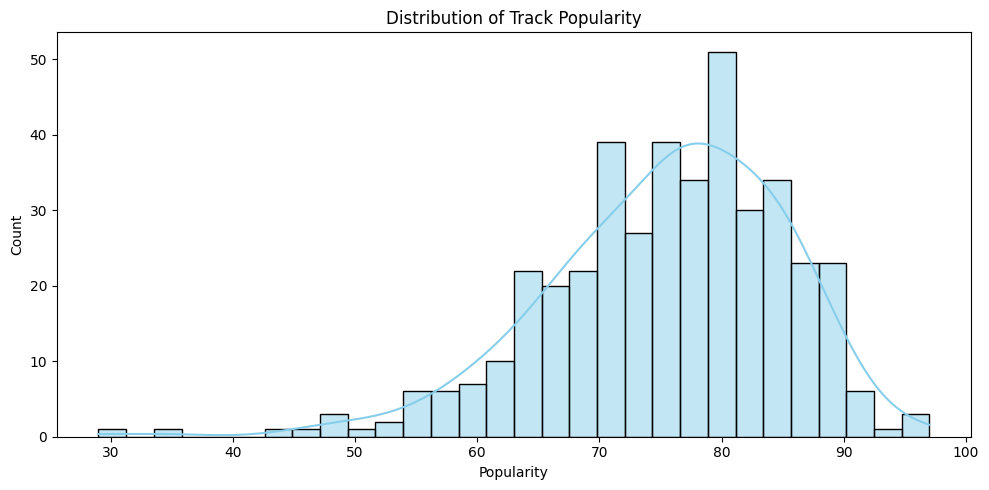

In [94]:
# Plot histogram of popularity
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot'''

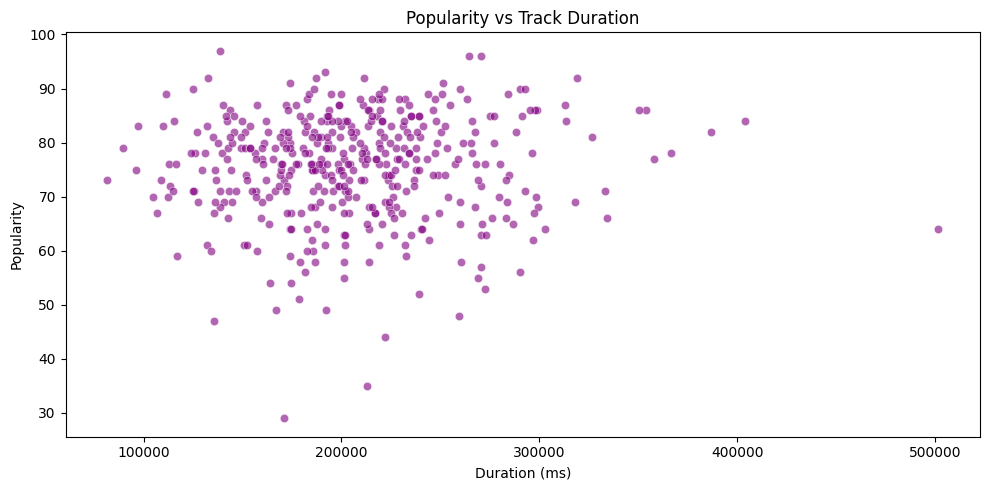

In [95]:
# Scatter plot of Popularity vs Duration (ms)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', color='purple', alpha=0.6)
plt.title("Popularity vs Track Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()


In [ ]:
'''Q.4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot'''

/tmp/ipython-input-96-158761963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='magma')


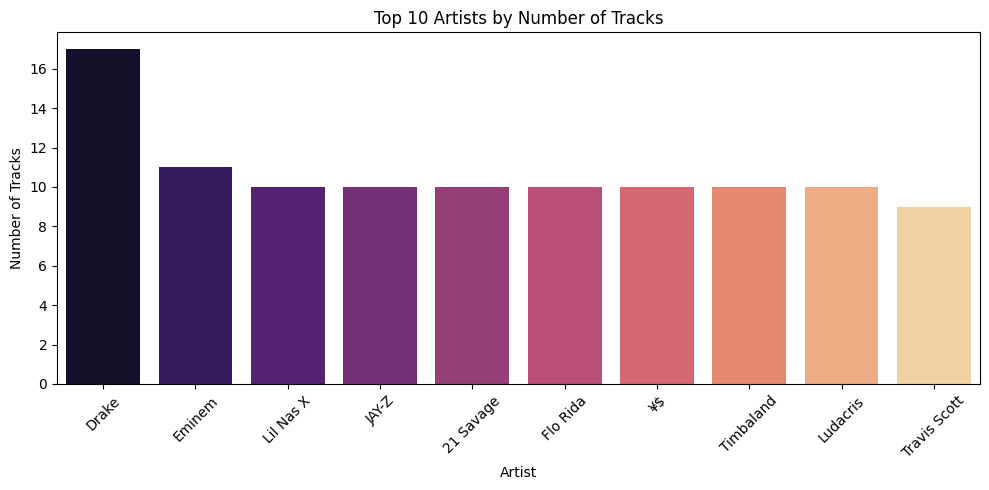

In [96]:
# Count the number of tracks per artist (top 10 only for readability)
top_artists = df['Artist'].value_counts().head(10)

# Plot using countplot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='magma')
plt.title("Top 10 Artists by Number of Tracks")
plt.ylabel("Number of Tracks")
plt.xlabel("Artist")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each'''

In [97]:
# Sort by Popularity in ascending order
least_popular = df.sort_values(by='Popularity', ascending=True)

# Get top 5 least popular tracks
least_popular_tracks = least_popular[['Artist', 'Track Name', 'Popularity']].head(5)

# Display result
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [ ]:
'''Q.6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist'''

In [98]:
# Step 1: Calculate average popularity per artist
artist_avg_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Step 2: Get top 5 most popular artists based on average popularity
top_5_popular_artists = artist_avg_popularity.head(5)

# Display results
print("Top 5 artists with highest average popularity:")
print(top_5_popular_artists)


Top 5 artists with highest average popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [ ]:
'''Q.7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist'''

In [99]:
# Step 1: Get top 5 most popular artists by average popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index.tolist()

# Step 2: Filter dataset for those artists
top_artist_tracks = df[df['Artist'].isin(top_5_artists)]

# Step 3: Get most popular track per artist
most_popular_tracks = top_artist_tracks.sort_values(['Artist', 'Popularity'], ascending=[True, False]) \
                                       .groupby('Artist').first().reset_index()

# Display result
print("Most popular track for each of the top 5 most popular artists:")
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Most popular track for each of the top 5 most popular artists:
         Artist                    Track Name  Popularity
0  David Guetta            Baby Don't Hurt Me          87
1  Travis Scott    FE!N (feat. Playboi Carti)          93
2        Trueno  Mamichula - con Nicki Nicole          89
3         cassö                         Prada          92
4            ¥$                      CARNIVAL          96


In [ ]:
'''Q.8 Visualize relationships between multiple numerical variables simultaneously using a pair plot'''

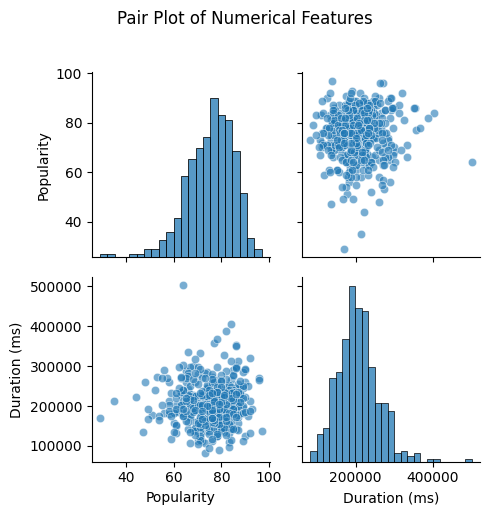

In [100]:
# Select numerical columns for pairplot
numeric_df = df[['Popularity', 'Duration (ms)']]

# Plot pairplot
sns.pairplot(numeric_df, kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot'''

/tmp/ipython-input-101-3386881891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_artist_df, x='Artist', y='Duration (ms)', palette='Set2')


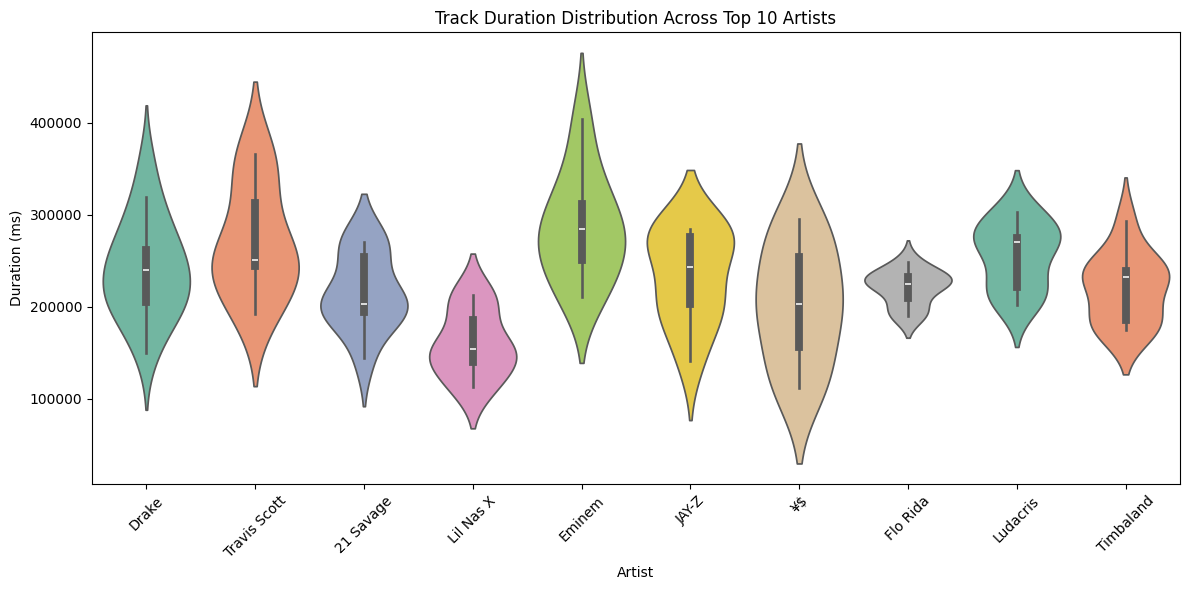

In [101]:
# Plot violin plot for duration across top 10 artists
top_10_artists = df['Artist'].value_counts().head(10).index
top_artist_df = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=top_artist_df, x='Artist', y='Duration (ms)', palette='Set2')
plt.title("Track Duration Distribution Across Top 10 Artists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''Q.10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot'''

/tmp/ipython-input-102-2705949345.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_artist_df, x='Artist', y='Popularity', inner=None, palette='Pastel1')


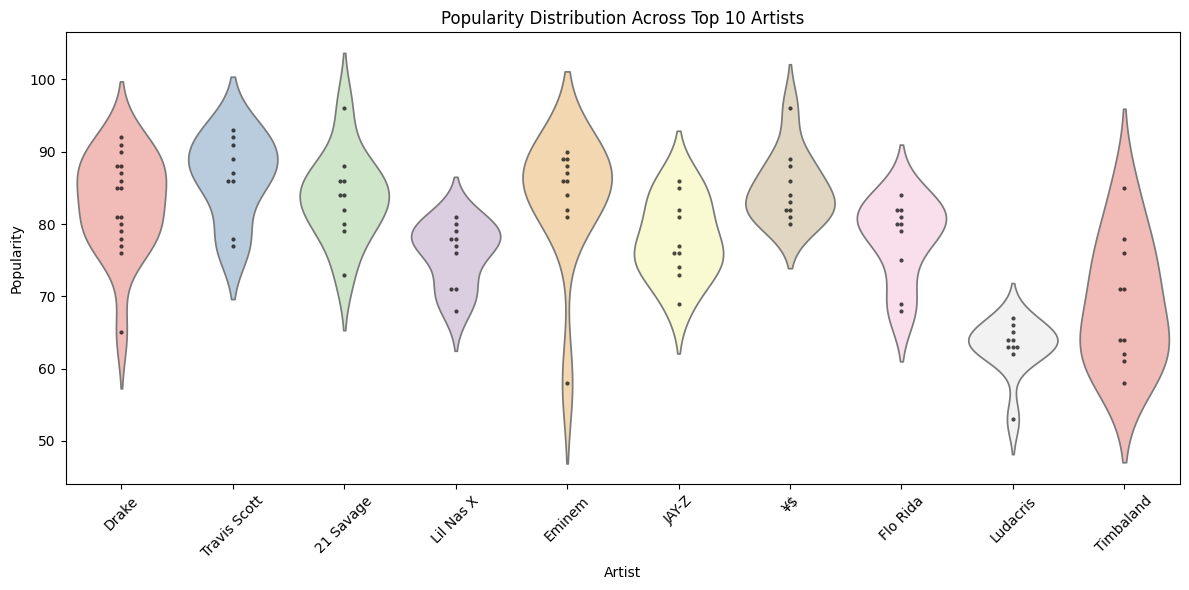

In [102]:
# Use top 10 artists for better visualization
top_10_artists = df['Artist'].value_counts().head(10).index
top_artist_df = df[df['Artist'].isin(top_10_artists)]

# Swarm plot of popularity across artists
plt.figure(figsize=(12, 6))
sns.violinplot(data=top_artist_df, x='Artist', y='Popularity', inner=None, palette='Pastel1')
sns.swarmplot(data=top_artist_df, x='Artist', y='Popularity', color='black', alpha=0.7, size=3)
plt.title("Popularity Distribution Across Top 10 Artists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
